In [4]:
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
 
import statsmodels.api as sm


import numpy as np

import datetime as dt
import time

In [67]:
data = pd.read_csv("vaccination_china.csv")

In [68]:
data.head()

,date,total_vaccinations_raw,total_vaccinations
0,2021/3/22,80460000,80.4600
1,2021/3/23,82846000,82.8460
2,2021/3/24,85859700,85.8597
3,2021/3/25,91346000,91.3460
4,2021/3/26,97470000,97.4700


In [69]:
data = data.reset_index()
data['date'] = pd.to_datetime(data['date'])
data.head()

,index,date,total_vaccinations_raw,total_vaccinations
0,0,2021-03-22,80460000,80.4600
1,1,2021-03-23,82846000,82.8460
2,2,2021-03-24,85859700,85.8597
3,3,2021-03-25,91346000,91.3460
4,4,2021-03-26,97470000,97.4700


In [71]:
print(data['index'])
print(data['total_vaccinations'])

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
Name: index, dtype: int64
0      80.4600
1      82.8460
2      85.8597
3      91.3460
4      97.4700
5     102.4170
6     106.6130
7     110.9620
8     114.6900
9     119.8210
10    126.6160
11    133.8010
12    136.6770
13    139.9700
14    142.8020
15    145.9200
16    149.0710
17    155.1500
18    161.1210
19    164.4710
20    167.3430
21    171.9280
22    175.6230
23    179.2160
24    183.5360
Name: total_vaccinations, dtype: float64


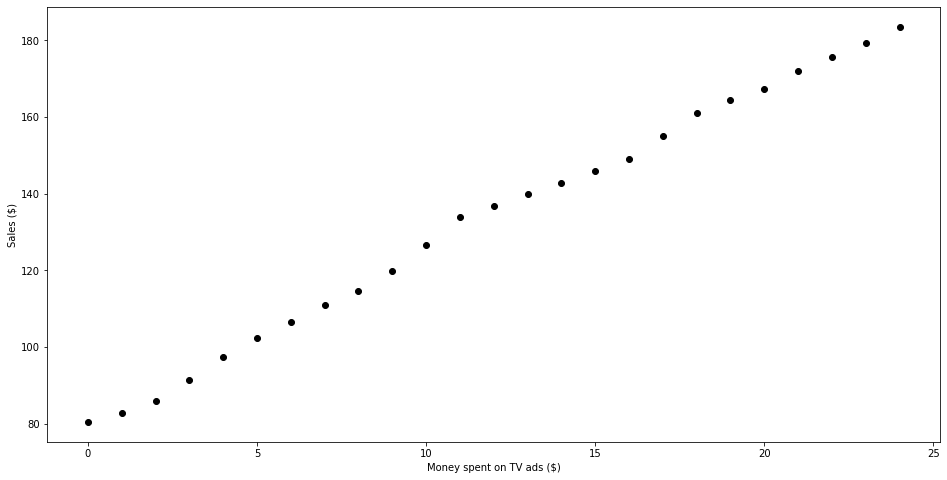

In [70]:
plt.figure(figsize=(16, 8))
plt.scatter(
data['index'],
data['total_vaccinations'],
c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [106]:
X = data['index'].values.reshape(-1,1)
y = data['total_vaccinations'].values.reshape(-1,1)


reg = LinearRegression()

reg.fit(X, y)



print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 80.27 + 4.3966X


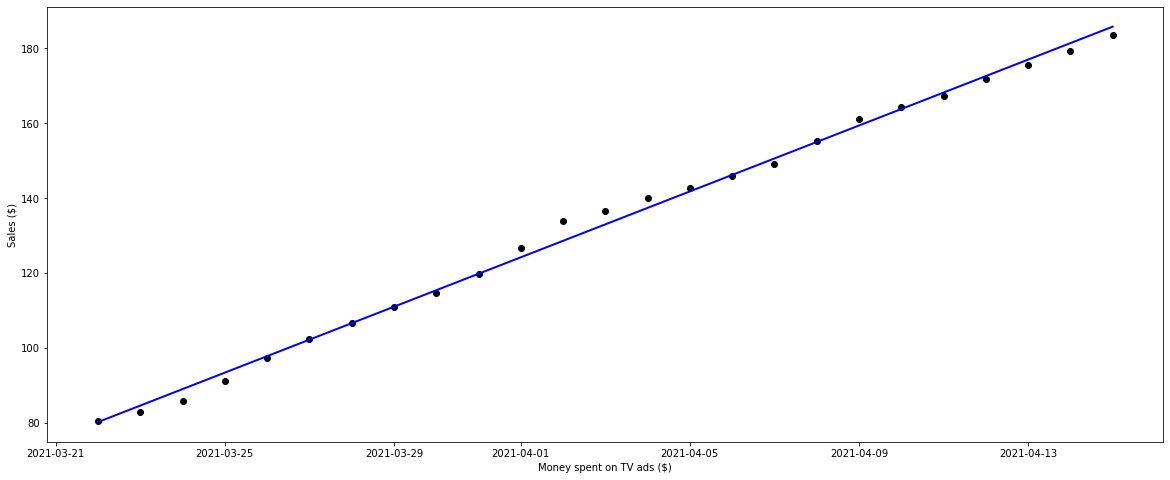

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
Name: index, dtype: int64
<class 'pandas.core.series.Series'>
[[ 80.27012646]
 [ 84.66671492]
 [ 89.06330338]
 [ 93.45989185]
 [ 97.85648031]
 [102.25306877]
 [106.64965723]
 [111.04624569]
 [115.44283415]
 [119.83942262]
 [124.23601108]
 [128.63259954]
 [133.029188  ]
 [137.42577646]
 [141.82236492]
 [146.21895338]
 [150.61554185]
 [155.01213031]
 [159.40871877]
 [163.80530723]
 [168.20189569]
 [172.59848415]
 [176.99507262]
 [181.39166108]
 [185.78824954]]
[ 80.27012646  84.66671492  89.06330338  93.45989185  97.85648031
 102.25306877 106.64965723 111.04624569 115.44283415 119.83942262
 124.23601108 128.63259954 133.029188   137.42577646 141.82236492
 146.21895338 150.61554185 155.01213031 159.40871877 163.80530723
 168.20189569 172.59848415 176.99507262 181.3916

In [115]:
predictions = reg.predict(X)

 
plt.figure(figsize=(20, 8))
plt.scatter(
    data['date'],
    data['total_vaccinations'],
    c='black',
    label= 'Actual Price'
)
plt.plot(
    data['date'],
    predictions,
    c='blue',
    linewidth=2,
    label= 'Actual Price'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()
print(data['index'])
print(type(data['index']))
print(predictions)
print(predictions.flatten())

In [74]:
X = data['index']
y = data['total_vaccinations']
 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     total_vaccinations   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6373.
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           1.29e-29
Time:                        20:03:31   Log-Likelihood:                -51.581
No. Observations:                  25   AIC:                             107.2
Df Residuals:                      23   BIC:                             109.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.2701      0.771    104.104      0.0

In [97]:
x=np.linspace(0,210)
print(x)

[  0.           4.28571429   8.57142857  12.85714286  17.14285714
  21.42857143  25.71428571  30.          34.28571429  38.57142857
  42.85714286  47.14285714  51.42857143  55.71428571  60.
  64.28571429  68.57142857  72.85714286  77.14285714  81.42857143
  85.71428571  90.          94.28571429  98.57142857 102.85714286
 107.14285714 111.42857143 115.71428571 120.         124.28571429
 128.57142857 132.85714286 137.14285714 141.42857143 145.71428571
 150.         154.28571429 158.57142857 162.85714286 167.14285714
 171.42857143 175.71428571 180.         184.28571429 188.57142857
 192.85714286 197.14285714 201.42857143 205.71428571 210.        ]


In [98]:
y_predict=reg.predict(x.reshape(-1,1))
print(y_predict)

[[  80.27012646]
 [  99.11264844]
 [ 117.95517042]
 [ 136.7976924 ]
 [ 155.64021437]
 [ 174.48273635]
 [ 193.32525833]
 [ 212.16778031]
 [ 231.01030229]
 [ 249.85282426]
 [ 268.69534624]
 [ 287.53786822]
 [ 306.3803902 ]
 [ 325.22291218]
 [ 344.06543415]
 [ 362.90795613]
 [ 381.75047811]
 [ 400.59300009]
 [ 419.43552207]
 [ 438.27804404]
 [ 457.12056602]
 [ 475.963088  ]
 [ 494.80560998]
 [ 513.64813196]
 [ 532.49065393]
 [ 551.33317591]
 [ 570.17569789]
 [ 589.01821987]
 [ 607.86074185]
 [ 626.70326382]
 [ 645.5457858 ]
 [ 664.38830778]
 [ 683.23082976]
 [ 702.07335174]
 [ 720.91587371]
 [ 739.75839569]
 [ 758.60091767]
 [ 777.44343965]
 [ 796.28596163]
 [ 815.1284836 ]
 [ 833.97100558]
 [ 852.81352756]
 [ 871.65604954]
 [ 890.49857152]
 [ 909.34109349]
 [ 928.18361547]
 [ 947.02613745]
 [ 965.86865943]
 [ 984.71118141]
 [1003.55370338]]


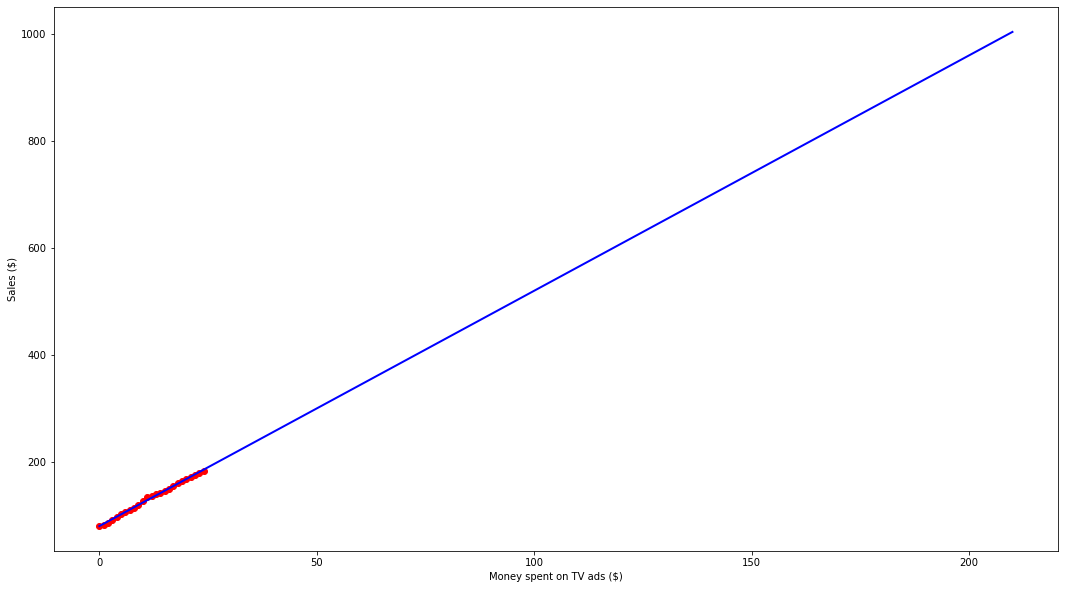

In [104]:
plt.figure(figsize=(18, 10))
plt.scatter(
    data['index'],
    data['total_vaccinations'],
    c='red'
)
plt.plot(
    x,
    y_predict,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

[Text(0, 0, ''),
 Text(0, 0, '1月13号'),
 Text(0, 0, '1月23号'),
 Text(0, 0, '2月2号'),
 Text(0, 0, '2月10号'),
 Text(0, 0, '2月20号')]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35786 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matpl

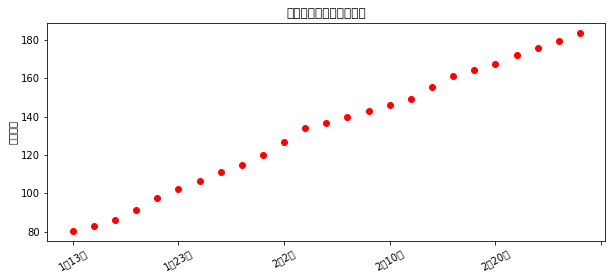

In [117]:
fig=plt.figure(figsize=(10,4)) #建立画布
ax=fig.add_subplot(1, 1, 1) 
plt.scatter(
    data['index'],
    data['total_vaccinations'],
    c='red'
) #真实数据散点图
#ax.set_xlabel("天数") #横坐标
ax.set_ylabel("确诊人数") #纵坐标
ax.set_title("确诊人数随时间变化情况") #标题
ax.set_xticklabels(['', '1月13号', '1月23号', '2月2号', '2月10号','2月20号'], rotation=30, fontsize=10) #自定义横坐标标签